# Deutsch-Jozsa Algorithm

The Deutsch-Jozsa Algorithm is the first quantum algorithm that showcases quantum's advantage over classical computers. It reveals the possibility of speeding up quantum algorithms exponentially. 

In this section, we first look at the Deutsch Algorithm, where we introduce the problem as well as both the classical and quantum solutions. After that, we look into the generalized Deutsch algorithm, which is the Deutsch-Jozsa Algorithm. 

## Deutsch Algorithm



### Deutsch's Problem
Introduced by Deutsch, the problem assumes that there is a function $f$ that is either balanced or constant, and needs to determine whether it is balanced or constant. For a one-bit function $f$, a constant function would give the same output regardless of the input, i.e., $f(0)=f(1)$; whereas a balanced function would give a different output based on its input, i.e., $f(0)\neq f(1)$. We can see all the four possible cases of a one-bit function in the table below: 
||$x$|$f(x)$|Type|
|:----|:----:|:----:|:----:|
|$f_1(x)=0$|0|0|constant|
||1|0||
|$f_2(x)=1$|0|1|constant|
||1|1||
$f_3(x)=x$|0|0|balanced|
||1|1||
|$f_4(x)=x\oplus1$|0|1|balanced|
||1|0||

We can treat the function as a black box. It can evaluate the function with given inputs, but we cannot see how the black box / function works. 


### Classical Solution

Classically, we need to evaluate the function with both the inputs 0 and 1. By determining whether the statement $f(0)=f(1)$ is true or not, we can determine whether the function is constant or balanced. 

Therefore, classically, we would need two computations to determine it. 


### Quantum Solution

Quantum mechanically, we can solve this problem with just one computation using Deutsch's algorithm, showcasing the advantage of quantum computers over classical ones. 

Let's take a look at the quantum circuit of Deutsch's algorithm:

In [157]:
from qiskit_aer import Aer as Aer 
from qiskit import QuantumRegister,ClassicalRegister,QuantumCircuit,transpile
from math import pi
import numpy as np
import random
from qiskit.visualization import plot_bloch_multivector, plot_histogram

sim = Aer.get_backend('aer_simulator')

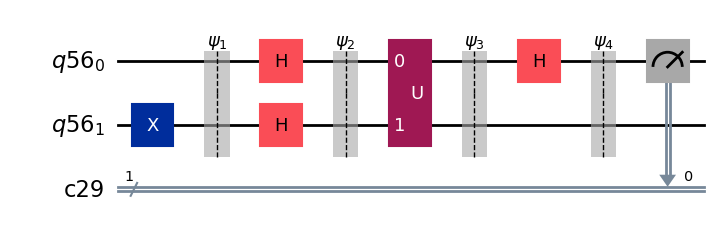

In [89]:
cr = ClassicalRegister(1)
qr = QuantumRegister(2)
qc = QuantumCircuit(qr,cr)

qc.x(1)
qc.barrier(label='$ψ_1$')
# state1 = sim.run(qc).result().data()['$ψ_1$']

qc.h([0,1])
qc.barrier(label='$ψ_2$')
# state2 = sim.run(qc).result().data()['$ψ_2$']

blackbox = QuantumCircuit(2)
output = np.random.randint(2)
blackbox_gate = blackbox.to_gate()
blackbox_gate.name = 'U'

qc.append(blackbox_gate,range(2))
qc.barrier(label='$ψ_3$')
# state3 = sim.run(qc).result().data()['$ψ_3$']

qc.h(0)

qc.barrier(label='$ψ_4$')
qc.measure(0,0)
# state4 = sim.run(qc).result().data()['$ψ_4$']

qc.draw("mpl")

With a one-bit function $f(x)$, we use a quantum circuit with 2 qubits. We start by preparing the state $$\psi_1=|01\rangle.$$ 
Then, we apply H-gate on all qubits, so the state becomes 
$$\begin{align} 
\psi_2 &= \left( \frac{|0\rangle + |1\rangle}{\sqrt{2}} \right)\left(\frac{|0\rangle - |1\rangle}{\sqrt{2}} \right)  \\
&= \frac{1}{2}\left( |00\rangle - |01\rangle + |10\rangle - |11\rangle \right)
\end{align}$$

Afterwards, we apply the unitary operation $\hat{U}$, which the influence on the states is:
$$ \hat{U} |x\rangle \otimes |y\rangle = |x\rangle \otimes |y\oplus f(x) \rangle$$
Let's break it down to the four possible cases and look at the state after $\hat{U}$ is applied. 

To illustrate the [phase kickback](./Phase-Kickback.ipynb) phenonmenon here, we take $q_0$ as $|x\rangle$ $q_1$ as $|-\rangle$, by applying $\hat{U}$  we obtain: 
$$ \begin{align} 
\hat{U}|x\rangle |-\rangle &= \frac{1}{\sqrt{2}} \left(\hat{U}|x\rangle|0\rangle - \hat{U}|x\rangle|1\rangle  \right)\\ 
&= \frac{1}{\sqrt{2}}\left( |x\rangle|f(x)\rangle - |x\rangle |1\oplus f(x)\rangle \right) \\
&= |x\rangle \otimes \frac{1}{\sqrt{2}}\left( |f(x)\rangle - |1\oplus f(x)\rangle \right)  \\
&= \left\{ \begin{array}{ll} |x\rangle\frac{1}{\sqrt{2}}(|0\rangle -|1\rangle) = |x\rangle |-\rangle & f(x)=0 \\ |x\rangle\frac{1}{\sqrt{2}}(|1\rangle -|0\rangle) = -|x\rangle |-\rangle & f(x)=1  \end{array}\right.\\
&= (-1)^{f(x)}|x\rangle|-\rangle
\end{align}
$$ 

Moving back to how $\hat{U}$ interacts with $\psi_2$: 


||$f(x)$|$\psi_3$|
|:----:|:----|:----|
|constant|$f_1(x)=0$|$\frac{1}{2} \left( |00\rangle - |01\rangle + |10\rangle - |11\rangle \right) = \left(\frac{|0\rangle+|1\rangle}{\sqrt{2}}\right)\otimes \left(\frac{|0\rangle-|1\rangle}{\sqrt{2}}\right) = |+\rangle |-\rangle $|
||$f_2(x)=1$|$\frac{1}{2} \left( |01\rangle - |00\rangle + |11\rangle - |10\rangle \right) = -\left(\frac{|0\rangle+|1\rangle}{\sqrt{2}}\right)\otimes \left(\frac{|0\rangle-|1\rangle}{\sqrt{2}}\right) = -|+\rangle |-\rangle $|
|balanced|$f_3(x)=x$|$\frac{1}{2} \left( |00\rangle - |01\rangle + |11\rangle - |10\rangle \right) = \left(\frac{|0\rangle-|1\rangle}{\sqrt{2}}\right)\otimes \left(\frac{|0\rangle-|1\rangle}{\sqrt{2}}\right) = |-\rangle |-\rangle $|
||$f_4(x)=x\oplus1$|$\frac{1}{2} \left( |01\rangle - |00\rangle + |10\rangle - |11\rangle \right) = -\left(\frac{|0\rangle-|1\rangle}{\sqrt{2}}\right)\otimes \left(\frac{|0\rangle-|1\rangle}{\sqrt{2}}\right) = -|-\rangle |-\rangle $|

We see that although $q_0$ is the control, after applying $\hat{U}$, we can see that $q_1$ remains unchanged, while $q_0$ can be changed. For constant functions, $q_0$ remains $|+\rangle$; whereas for balanced functions, $q_0$ becomes $|-\rangle$. This can be measured by changing $q_0$ back to the measurement basis by applying the H-gate, which gives 
$$ \psi_4 = \left\{ \begin{array}{rr}
\pm |+\rangle|-\rangle & \text{constant function } (f(0)=f(1)) \\ \pm |-\rangle |-\rangle & \text{balanced function } (f(0)\neq f(1))
\end{array}\right. $$ 

By measuring $q_0$, we are able to determine whether the function is balanced or constant with only one measurement, making it more efficient than the classical method. 

## Back to Deutsch-Jozsa Algorithm

### Deutsch-Jozsa Problem

The Deutsch-Jozsa problem is a generalisation of the Deutsch Problem. It has a function with $n$ inputs instead of only 1 input and remains having a one-bit outcome. The function $f:\{0,1\}^n \rightarrow \{0,1\}$ is promised to be either constant or balanced. In this problem, a function is constant when the output remains the same for any input. A function is balanced when exactly half of the possible inputs have an output of 0, and the remaining half have an output of 1.  

### Classical Solution 

Classically, we need to query the function for $2^{n-1}+1$ times to have a 100% certainity of whether the function is constant of balanced. 

When the given function is balanced, it can require less than $2^{n-1}+1$ queries. Whenever there is an output that is different from the previous output(s), then we can conclude that the function is balanced. In the best case scenario, we can determine a function is balanced if the output of the first 2 queries are different. 

However, when the given function is constant, we would require to perform $2^{n-1}+1$ queries of the function. We need to check exactly half of the possible input plus one to be certain the function is cosntant. For example, a function with 5 bit inputs, there are a total of $2^5=32$ possible inputs. So, 16 inputs would have an output of 0 and another 16 inputs would have an output of 1. If we checked 16 inputs and are all 0, if the 17$^{th}$ input has an output of 1, then it is a balanced function, otherwise, we can be certain that the function is constant. 

When $n$ increases, the number of computation needed increases exponentially, making it very resource intensive. 

### Quantum Solution

The general idea of Deutsch-Jozsa Algorithm is similar to the Deutsch Algorithm. Here, we need $n+1$ qubits. 

Here we look at the quantum circuit of the Deutsch-Jozsa algorithm. 

We first start by   $n+1$ qubits with the $n+1^{th}$ qubit as $|1\rangle$. So the initial state is 
$$ \psi_1 = |0\rangle ^{\otimes n}|1\rangle $$

Then, we put them into superposition by applying a H-gate to each qubit, which can be expressed as 
$$ \psi_2 = \frac{1}{\sqrt{2^n}} \sum_{x\in \{0,1\}^n} |x\rangle |-\rangle $$ 

Now, we apply the unitary transformation $\hat{U}$. Earlier, we have established that $\hat{U}|x\rangle|-\rangle = (-1)^{f(x)}|x\rangle|-\rangle$, therefore, the state now becomes 
$$ \psi_3 = \frac{1}{\sqrt{2^n}} \sum_{x\in \{0,1\}^n} (-1)^{f(x)} |x\rangle |-\rangle $$ 
<!-- We can use the Deutsch's Algorithm to get an intuition of the phase kickback change the state. We can conclude it in the below table: 

|||$f(x)$|state|
|:-----:|:-----:|:-----:|:-----:|
|constant|$f_1(x)$| $\begin{align}f_1(0)&=0 \\ f_1(1)&=0\end{align}$ | $\hat{U}(|0\rangle + |1\rangle) = |0\rangle + |1\rangle$|
|constant|$f_2(x)$| $\begin{align}f_2(0)&=1 \\ f_2(1)&=1\end{align}$ | $\hat{U}(|0\rangle + |1\rangle) = -(|0\rangle + |1\rangle)$|
|balanced|$f_3(x)$| $\begin{align}f_3(0)&=0 \\ f_3(1)&=1\end{align}$ | $\hat{U}(|0\rangle + |1\rangle) = |0\rangle - |1\rangle$|
|balanced|$f_4(x)$| $\begin{align}f_4(0)&=1 \\ f_4(1)&=0\end{align}$ | $\hat{U}(|0\rangle + |1\rangle) = -(|0\rangle - |1\rangle)$|
 -->

By applying $H^{\otimes n}$ gate, the first $n$ qubits is changed into measurement basis ($|0\rangle,|1\rangle$), which can expressed 
$$ H^{\otimes n}|x\rangle = \frac{1}{\sqrt{2^n}} \sum_{x\in \{0,1\}^n} (-1)^{x\cdot y}|y\rangle $$ 
where $y\in \{0,1\}$, and $ x \cdot y = x_0 y_0 \oplus x_1y_1 \oplus \dots \oplus x_{n-1}y_{n-1}$. 
This gives the state as 
$$ \psi_4 = \frac{1}{2^n}\sum_{x\in\{0,1\}^n} (-1)^{f(x)} \left[ \sum_{y\in\{0,1\}^n}(-1)^{x\cdot y}|y\rangle \right] |-\rangle$$ 

Now, we can measure the first $n$ qubits. The probability of measuring $|0\rangle ^{\oplus n}$ is $\lvert \frac{1}{2^n}\sum_{x=0}^{2^n-1}(-1)^{f(x)} \rvert^2$, which is 1 when the function is constant. When the function is balanced, the probability of such is 0. Therefore, we are able to determine whether the function is constant or balanced. This exponentially speed up the query complexity compared to classical case, demonstrating a quantum advantage. 

## Qiskit Implementation 

### Constant function 

Let's take a look how the blackbox works for constant functions. 

1. Case 1: $f_1(x)=0$

    Any input would result to an output of 0, and since $y\oplus 0 = y$, there are no change in the last qubit ($q_n$). Therefore, we can represent the blackbox of this case by applying $I$ gate to $q_n$. 

3. Case 2: $f_2(x)=1$

    Any input would result to an output of 1. Since $|0\oplus\rangle = |1\rangle$ and $|1\oplus\rangle = |0\rangle$, $y\oplus 1$ is equivalent to having a not gate. Therefore, the blackbox can be represented by applying a $X$ gate to $q_n$. 

In [31]:
# set the length of the n-bit input string. 
n = 3

def const_Blackbox(n):
    # Creating a circuit with n+1 qubit
    const = QuantumCircuit(n+1)

    # Randomly generating the output of a constant f(x)
    # If output = 0: the function is f(x) = 0 for any x
    # If output = 1: the function is f(x) = 1 for any x 
    output = np.random.randint(2)
    if output == 1:
        const.x(n)
    
    return const
    
const_box = const_Blackbox(4)

const_box.draw()

q_0: ─────
          
q_1: ─────
          
q_2: ─────
          
q_3: ─────
     ┌───┐
q_4: ┤ X ├
     └───┘

### Balanced Function

There are many methods to create the blackbox for a function. One of the methods that we can guarentee that the circuit is balanced, with exactly half inputs results in 0 and exactly half inputs reuslts in 1 is performing a CNOT for each of the first $n$ qubit with $q_n$ as the target. 

For example: 

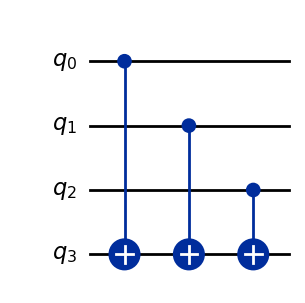

In [33]:
qc = QuantumCircuit(4)
qc.cx(0,3)
qc.cx(1,3)
qc.cx(2,3)
qc.draw("mpl")

The top three qubits ($q_0$,$q_1$,$q_2$) are the input register where as the last qubit $q_3$ is the output register. We can observe from the below tabel that the circuit is indeed balanced: 

|Input $(x_0,x_1,x_2)$|Output $f(x_0,x_1,x_2)$|
|:-----:|:-----:|
|000|0|
|001|1|
|010|1|
|100|1|
|011|0|
|101|0|
|110|0|
|111|1|

We can obtain a different balanced function by wrapping the selectied qubits with $X$-gates. 

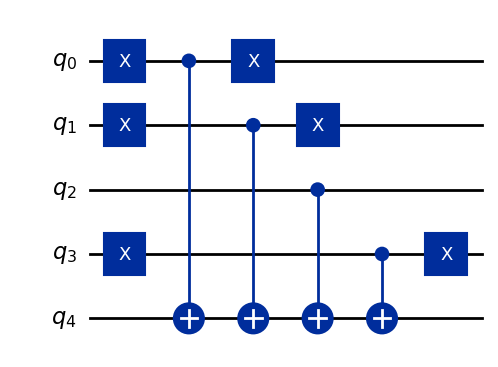

In [164]:
def bal_Blackbox(n):
    # Creating a circuit with n+1 qubit
    bal = QuantumCircuit(n+1)

    # Generating a list of 0 and 1 of length = n 
    boolean_list = random.choices([0,1],k=n)

    # Placing first X gates such that the selected qubits are wrapped with X-gates
    for qubit in range(n):
        if boolean_list[qubit] == 1:
            bal.x(qubit)
    
    # bal.barrier()

    # Applying CNOT gate to each qubit with the last qubit as the target
    for qubit in range(n):
        bal.cx(qubit,n)

    # bal.barrier()

    # Placing second X gates such that the selected qubits are wrapped with X-gates
    for qubit in range(n):
        if boolean_list[qubit] == 1:
            bal.x(qubit)
        
    return bal
    
bal_box = bal_Blackbox(4)

bal_box.draw("mpl")

In [165]:
def circuit_to_gate(circuit):
    circuit_gate = circuit.to_gate()
    circuit_gate.name = '$U$'
    return circuit_gate

In [141]:
const_or_bal = random.choice(['bal','const'])
print(const_or_bal == 'bal')

True


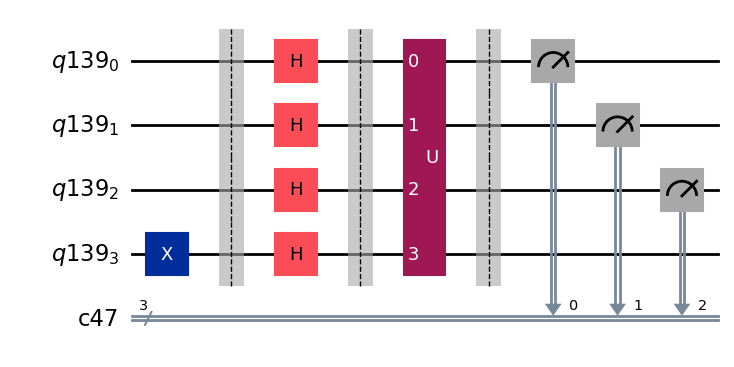

In [162]:
# Set the size of the input register 
n = 1

def Circuit(n=2):
    cr = ClassicalRegister(n)
    qr = QuantumRegister(n+1)
    qc = QuantumCircuit(qr,cr)

    # Initialising the qubits with the last qubit at |1>
    qc.x(n)
    qc.barrier()

    for qubit in range(n+1):
        qc.h(qubit)
    qc.barrier()
    
    # Randomly selecting whether the funtion is constant or balanced 
    # const_or_bal = random.choice(['bal','const'])
    const_or_bal = 'bal'
    if const_or_bal == 'bal':
        blackbox = bal_Blackbox(n)
    else:
        blackbox = const_Blackbox(n)
    blackbox_gate = blackbox.to_gate()
    blackbox_gate.name = 'U'
    
    qc.append(blackbox_gate,range(n+1))
    qc.barrier()

    # Measuring the first n qubits 
    for i in range(n):
        qc.measure(i,i)

    return qc

qc = Circuit(n=3)

qc.draw("mpl")

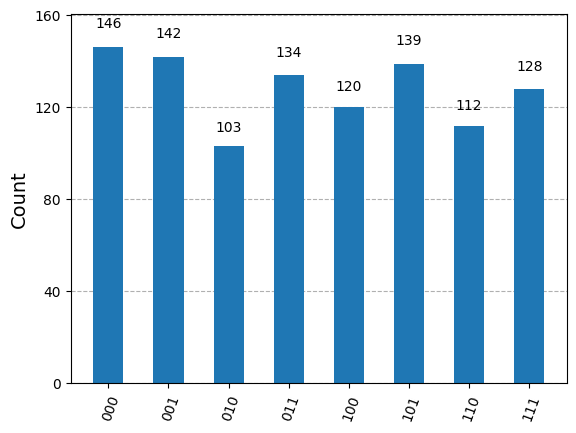

In [163]:
transpiled = transpile(qc,sim)
result = sim.run(transpiled).result()

plot_histogram(result.get_counts(qc))